2023-02-28 <br/>
African Language Sentiment <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-02-28/readme.md

Interactive Subplots with dropdown - Completed 

https://community.plotly.com/t/combining-multiple-subplots-with-drop-down-menu-buttons/49513 <br/>
https://plotly.com/python/table-subplots/


In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-28/afrisenti.csv")
df.head()

,language_iso_code,tweet,label,intended_use
0,amh,አማራ ክልል ፈልቶበታል ልኩን ማስገባት ነው!!! ሙስሊሞችን ጠልቶ 85% ...,negative,dev
1,amh,ሰውን አንገት በሚያስደፋ መልኩ ዝም ብሎ ሙድ መያዝ....ስልህ ያ ሰው ም...,negative,dev
2,amh,የቤት ውስጥ ጥቃት – ያለሰሚ – ያለተመልካች,negative,dev
3,amh,Ethiopia ወያኔን ለመጣል ምን ድርሻ ነበራችሁ ? ከወደቀ በኋላ ጉራ ...,negative,dev
4,amh,ኦሮሞ ምንም ቢማር ከብት ነዉ አያስተዉልም ጥንብ ዘረኛ ናቸዉ,negative,dev


In [3]:
df_language = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-28/language_countries.csv")
df_language.head()

,language_iso_code,country
0,amh,Ethiopia
1,arq,Algeria
2,ary,Morocco
3,hau,Cameroon
4,hau,Ghana


In [4]:
df.language_iso_code.value_counts()

hau      22152
ibo      15715
yor      15127
pcm      10556
amh       9480
ary       9038
pt-MZ     7492
kin       5155
twi       4818
arq       3023
swa       3011
orm       2494
tir       2398
tso       1261
Name: language_iso_code, dtype: int64

In [5]:
# Get total counts
df_sentiment_group = df.groupby(["language_iso_code","label"]).agg(totals=("intended_use","count")).reset_index()
df_sentiment_group.head()

,language_iso_code,label,totals
0,amh,negative,3273
1,amh,neutral,4104
2,amh,positive,2103
3,arq,negative,1590
4,arq,neutral,582


In [6]:
df_sentiment_combined = df_sentiment_group.merge(df_language, how = 'inner', left_on="language_iso_code", right_on="language_iso_code")[["country","label","totals"]]

df_sentiment_combined.head()

,country,label,totals
0,Ethiopia,negative,3273
1,Ethiopia,neutral,4104
2,Ethiopia,positive,2103
3,Algeria,negative,1590
4,Algeria,neutral,582


In [7]:
# Get 10 random samples for each language and sentiment
df_language_samples = df.groupby(["language_iso_code","label"]).apply(lambda x: x.sample(10)).reset_index(drop=True)
df_language_samples.head()


,language_iso_code,tweet,label,intended_use
0,amh,'@user አንተ ደደብ ከደደቢት ይሁን ከተንቤን ዋሻ መከላከያ ጌቶችህን ...,negative,test
1,amh,'@user @user አን ቆርቆሮ እኛ ባቀናናት ሀገር አንተ ምን እንደምን...,negative,test
2,amh,በርግጥ አለ ማለት ነው:: ደሞ የራስ መተማመን ጥግ እኮ የሌለ ነው ???...,negative,dev
3,amh,'እነዚህ ምእራባዊያን ግን ለምንድን ነው የኢዮዽያን እውነት መቀበል ካልፈ...,negative,test
4,amh,ቖሻሻ ትግራይ ውስጥ ስንት መስጅድ እንዳለ ብታውቅ ታብድ ነበር:: ለማንኛ...,negative,train


In [8]:
df_language_combined = df_language_samples.merge(df_language, how = 'inner', left_on="language_iso_code", right_on="language_iso_code")[["country","tweet","label"]]

df_language_combined.head()

,country,tweet,label
0,Ethiopia,'@user አንተ ደደብ ከደደቢት ይሁን ከተንቤን ዋሻ መከላከያ ጌቶችህን ...,negative
1,Ethiopia,'@user @user አን ቆርቆሮ እኛ ባቀናናት ሀገር አንተ ምን እንደምን...,negative
2,Ethiopia,በርግጥ አለ ማለት ነው:: ደሞ የራስ መተማመን ጥግ እኮ የሌለ ነው ???...,negative
3,Ethiopia,'እነዚህ ምእራባዊያን ግን ለምንድን ነው የኢዮዽያን እውነት መቀበል ካልፈ...,negative
4,Ethiopia,ቖሻሻ ትግራይ ውስጥ ስንት መስጅድ እንዳለ ብታውቅ ታብድ ነበር:: ለማንኛ...,negative


In [9]:
df_sentiment_combined.head()

,country,label,totals
0,Ethiopia,negative,3273
1,Ethiopia,neutral,4104
2,Ethiopia,positive,2103
3,Algeria,negative,1590
4,Algeria,neutral,582


In [10]:
df_sentiment_combined.label.unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [11]:
# For a single Country: 

df_sentiment_combined_subset = df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"]
df_language_combined_subset= df_language_combined.loc[df_language_combined.country =="Nigeria"]

In [12]:
# Make pie chart 
map_dict={'negative':'red', 'neutral':'yellow', 'positive':'green'}

fig = go.Figure()
fig.add_trace(go.Pie(labels=df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"].label, values=df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"].totals,
                 marker_colors = df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"].label.map(map_dict)))


fig.show()

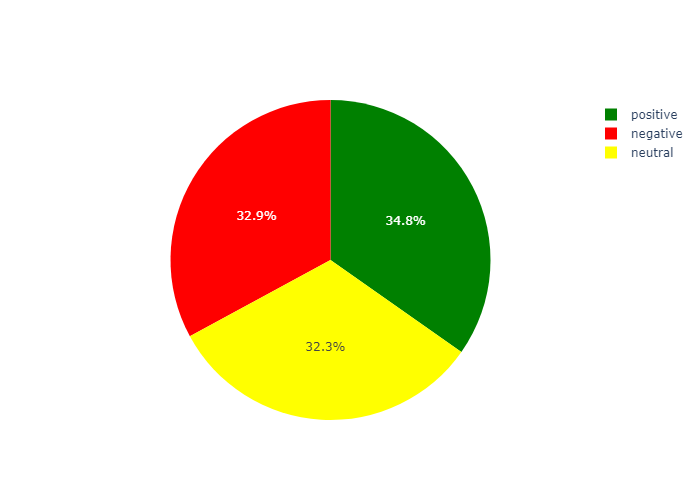

In [13]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [14]:
# Make the tabular data

fig = go.Figure()
fig.add_trace(go.Table(
  header=dict(
    values=["country","tweet","label"],
    line_color='darkslategray',
    fill_color='lightskyblue',
    align='center', font=dict(color='black', size=12)
  ),

  cells=dict(values=[df_language_combined.loc[df_language_combined.country =="Nigeria"].country,df_language_combined.loc[df_language_combined.country =="Nigeria"].tweet,df_language_combined.loc[df_language_combined.country =="Nigeria"].label], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
)

fig.show()

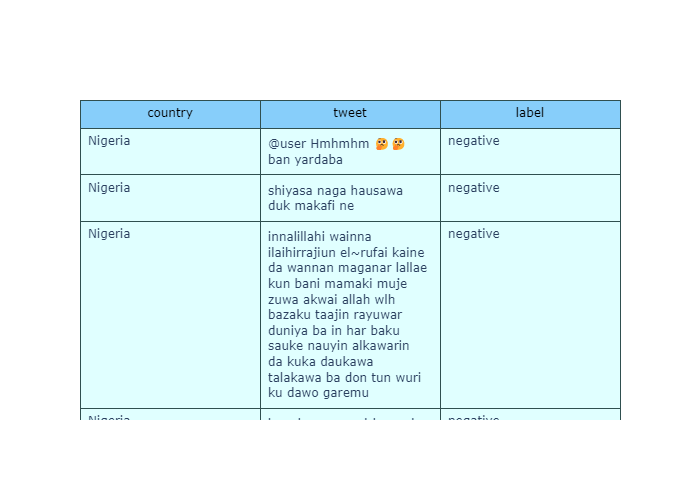

In [15]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [16]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "domain"}],
           [{"type": "table"}]]
)

fig.add_trace(go.Pie(labels=df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"].label, values=df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"].totals,
                 marker_colors = df_sentiment_combined.loc[df_sentiment_combined.country =="Nigeria"].label.map(map_dict))
                 , row=1, col=1)

fig.add_trace(go.Table(
  header=dict(
    values=["country","tweet","label"],
    line_color='darkslategray',
    fill_color='lightskyblue',
    align='center', font=dict(color='black', size=12)
  ),

  cells=dict(values=[df_language_combined.loc[df_language_combined.country =="Nigeria"].country,df_language_combined.loc[df_language_combined.country =="Nigeria"].tweet,df_language_combined.loc[df_language_combined.country =="Nigeria"].label], 
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
, row=2, col=1
)
fig.update_layout(width=800, height=1500, title_text="Nigeria - Passion behind the Tweets")
fig.show()

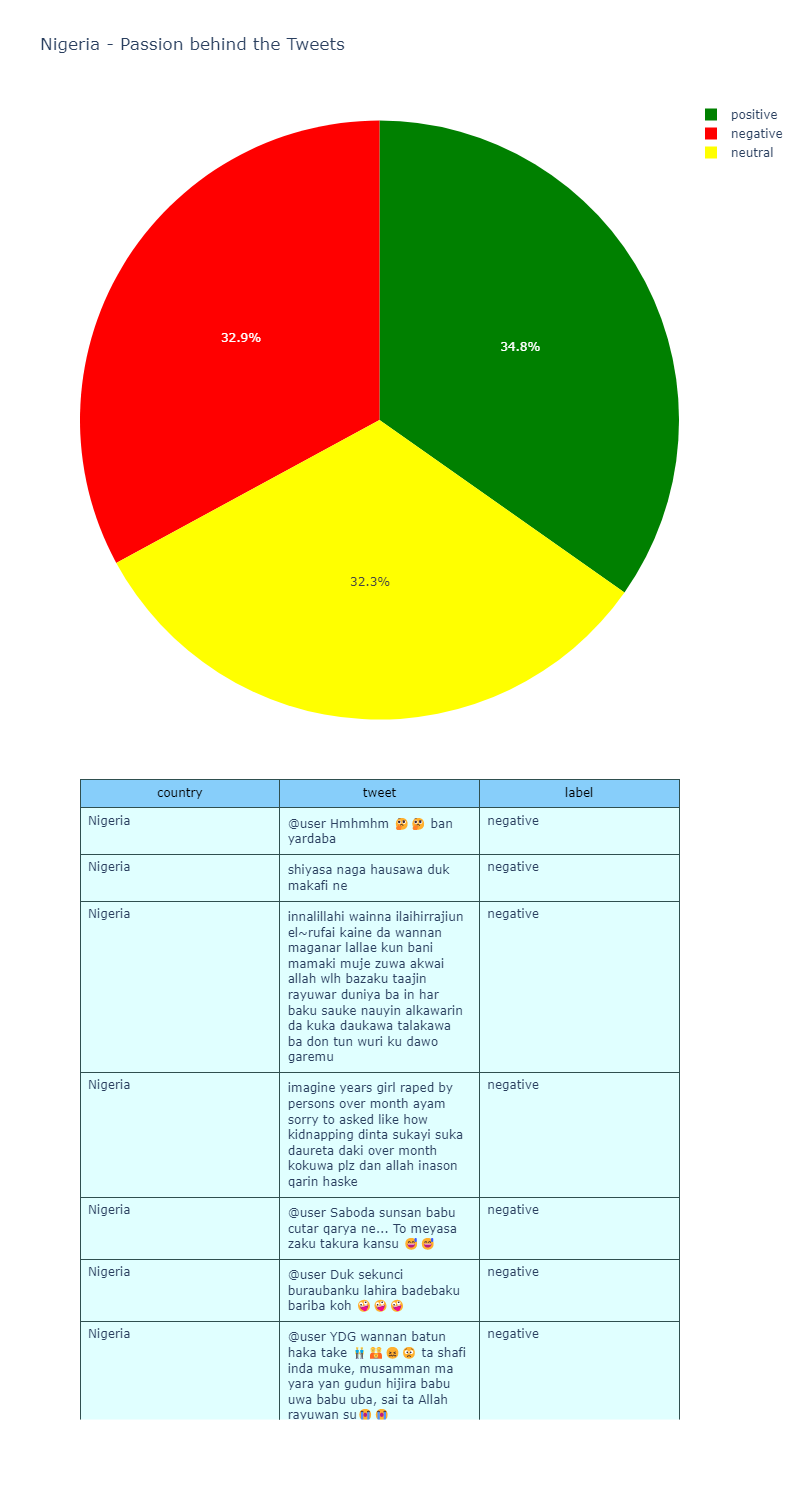

In [17]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [18]:
# Making this interactive using dropdown menu 


fig = make_subplots(
rows=2, cols=1,
shared_xaxes=True,
vertical_spacing=0.03,
specs=[[{"type": "domain"}],
        [{"type": "table"}]]
)

countries =  df_language_combined.country.unique()
for country in countries: 
    
    fig.add_trace(go.Pie(labels=df_sentiment_combined.loc[df_sentiment_combined.country ==country].label, values=df_sentiment_combined.loc[df_sentiment_combined.country ==country].totals,
                marker_colors = df_sentiment_combined.loc[df_sentiment_combined.country ==country].label.map(map_dict))
                , row=1, col=1)

    fig.add_trace(go.Table(
    header=dict(
        values=["country","tweet","label"],
        line_color='darkslategray',
        fill_color='lightskyblue',
        align='center', font=dict(color='black', size=12)
    ),

    cells=dict(values=[df_language_combined.loc[df_language_combined.country == country].country,df_language_combined.loc[df_language_combined.country ==country].tweet,df_language_combined.loc[df_language_combined.country ==country].label], 
                line_color='darkslategray',
                fill_color='lightcyan',
                align='left'))
    , row=2, col=1
    )

Ld=len(fig.data)
Lc =len(countries)
for k in range(2, Ld):
    fig.update_traces(visible=False, selector = k)
def create_layout_button(k, country):
    
    visibility= [False]*2*Lc
    for tr in [2*k, 2*k+1]:
        visibility[tr] =True
    return dict(label = country,
                method = 'restyle',
                args = [{'visible': visibility,
                            'title': country,
                            'showlegend': True}])    


fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active = 0,
        buttons = [create_layout_button(k, country) for k, country in enumerate(countries)]
        )
    ],
    title_text="African Languages - Passion behind the Tweets")

fig.show()

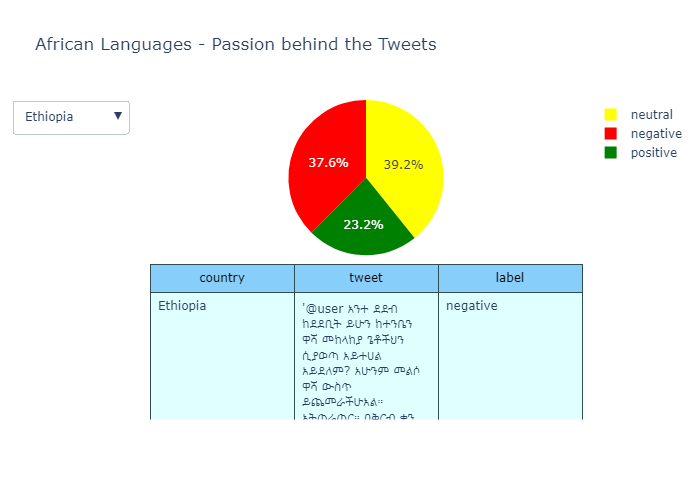

In [19]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)